## Problem 2 

## (a)

#### Models are being fitted with increasing complexity with a forward stepwise selection. The models are being trained on a separate training dataset and the predictions made using a test set. RMSE is being calculated for both original Cost values and log(cost) values, and these two values are being ploted. The plots seems quite stable and are showing the error of the models decreasing as the complexity (more features) are being added. But after 2 features the gain in accuracy seems to trail off. 

In [1]:
library(MASS)
#Problem 1
datadir = "http://www.uio.no/studier/emner/matnat/math/STK2100/data/"
nuclear = read.table(paste(datadir,"nuclear.dat",sep=""),header=T)
n = nrow(nuclear)

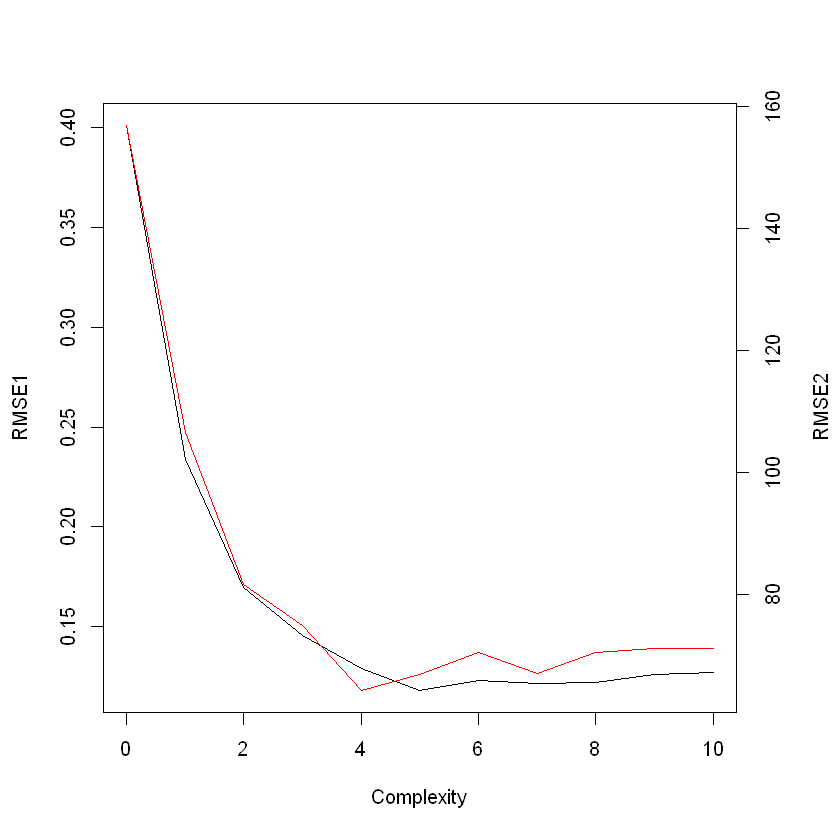

In [2]:
#Problem 2
#Train/test
n = nrow(nuclear)
ind = sample(1:n,n/2,replace=FALSE)
RMSE.test1 = rep(NA,11) 
RMSE.test2 = rep(NA,11) 
model_narrow = lm(log(cost) ~ 1, data = nuclear)
model_wide = lm(log(cost) ~ ., data = nuclear)
for(i in 0:10)
{
 fit = stepAIC(model_narrow, direction="forward", steps=i,data=nuclear[ind,],
               scope=list(lower=model_narrow, upper=model_wide),trace=0, k = 0)
 pred = predict(fit,nuclear[-ind,])
 RMSE.test1[i+1] = sqrt(mean((log(nuclear$cost[-ind])-pred)^2))
 RMSE.test2[i+1] = sqrt(mean((nuclear$cost[-ind]-exp(pred))^2))
}
par(mar = c(5, 4, 4, 4) + 0.3)  # Leave space for z axis
plot(0:10,RMSE.test1,xlab="Complexity",ylab="RMSE1",type="l") # first plot
par(new = TRUE)
plot(0:10,RMSE.test2, type = "l", axes = FALSE, bty = "n", xlab = "", ylab = "",col="red")
axis(side=4, at = pretty(range(RMSE.test2)))
mtext("RMSE2", side=4, line=3)

## (b)

#### The cv.lm returns metrics for evaluating the model based of the cross-validation method. Here its the K-fold cross-validation with 10 folds. The model is trained at different complexeties (no. of features) and then the RMSE score is calculated using K-fold cross-validation. This is done for the log values and non-log values as in the previous problem.

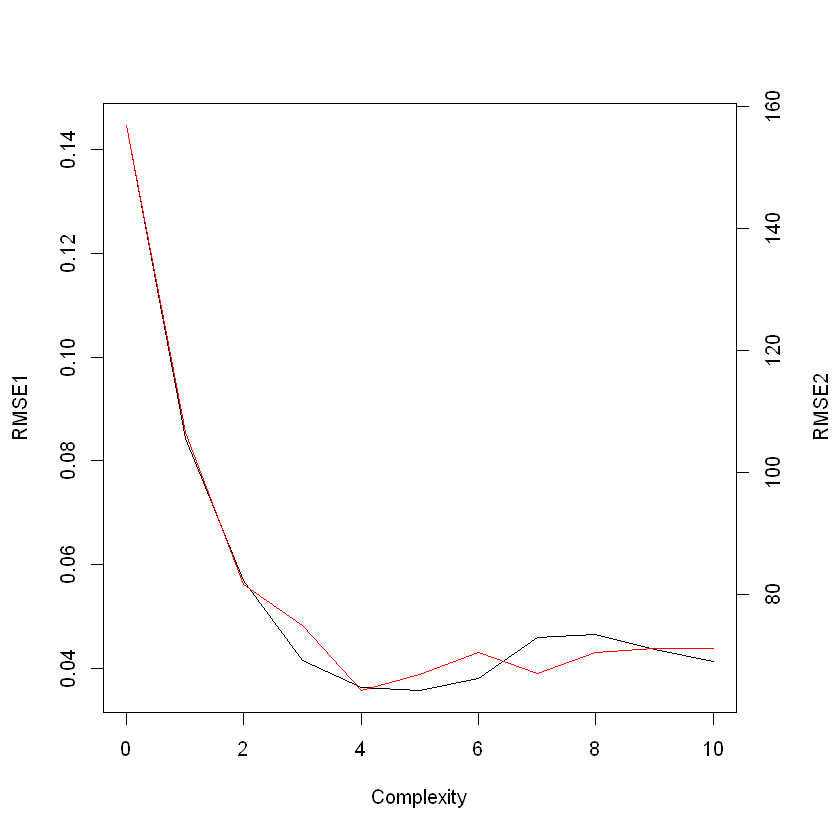

In [3]:
library(lmvar)
RMSE.cv1 = rep(0,10)
RMSE.cv2 = rep(0,10)
for(i in 0:10)
{
fit = stepAIC(model_narrow, direction="forward", steps=i,k=0,
        scope=list(lower=model_narrow, upper=model_wide),trace=0)
 fit = lm(formula(fit),data=nuclear,x=TRUE,y=TRUE)
 #Note: the k in the command below has a different meaning than k above!!! 
 RMSE.cv1[i+1] = cv.lm(fit,k=10)$MSE$mean
 RMSE.cv2[i+1] = cv.lm(fit,k=10,log=TRUE)$MSE$mean
}
par(mar = c(5, 4, 4, 4) + 0.3)  # Leave space for z axis
plot(0:10,RMSE.cv1,xlab="Complexity",ylab="RMSE1",type="l") # first plot
par(new = TRUE)
plot(0:10,RMSE.test2, type = "l", axes = FALSE, bty = "n", xlab = "", ylab = "",col="red")
axis(side=4, at = pretty(range(RMSE.test2)))
mtext("RMSE2", side=4, line=3)

## (c)

### Using the parameter m=n in the cv.lm function should produce a leave-one-out cross-validation. The result seems to be fairly similar to the previous methods. The code takes somewhat longer to run. 

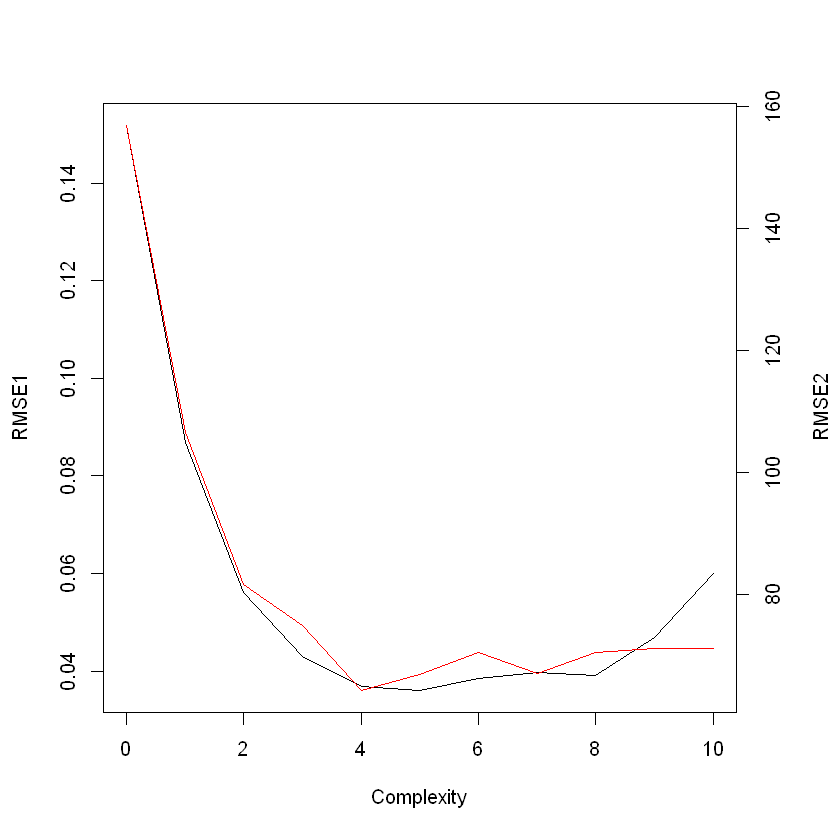

In [4]:
library(lmvar)
RMSE.cv1 = rep(0,10)
RMSE.cv2 = rep(0,10)
for(i in 0:10)
{
fit = stepAIC(model_narrow, direction="forward", steps=i,k=0,
        scope=list(lower=model_narrow, upper=model_wide),trace=0)
 fit = lm(formula(fit),data=nuclear,x=TRUE,y=TRUE)
 #Note: the k in the command below has a different meaning than k above!!! 
 RMSE.cv1[i+1] = cv.lm(fit,m=n)$MSE$mean
 RMSE.cv2[i+1] = cv.lm(fit,m=n,log=TRUE)$MSE$mean
}
par(mar = c(5, 4, 4, 4) + 0.3)  # Leave space for z axis
plot(0:10,RMSE.cv1,xlab="Complexity",ylab="RMSE1",type="l") # first plot
par(new = TRUE)
plot(0:10,RMSE.test2, type = "l", axes = FALSE, bty = "n", xlab = "", ylab = "",col="red")
axis(side=4, at = pretty(range(RMSE.test2)))
mtext("RMSE2", side=4, line=3)

## Problem 3 (e)

In [176]:
datadir = "http://www.uio.no/studier/emner/matnat/math/STK2100/data/"
Fe <- read.table(paste(datadir,"fe.txt",sep=""),
                 header=T,sep=",")

In [177]:
fit <- lm(Fe~form,data=Fe)
summary(fit)


Call:
lm(formula = Fe ~ form, data = Fe)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.113  -2.580  -0.290   2.901  11.279 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  21.5050     1.6202  13.273 7.59e-16 ***
form          2.8540     0.5916   4.824 2.30e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.183 on 38 degrees of freedom
Multiple R-squared:  0.3798,	Adjusted R-squared:  0.3635 
F-statistic: 23.27 on 1 and 38 DF,  p-value: 2.296e-05


The model tries to fit using Fe as response and form column as a feature. 

In [178]:
Fe$form <- as.factor(Fe$form)

fit1 <- lm(Fe~form-1,data=Fe)
summary(fit1)


Call:
lm(formula = Fe ~ form - 1, data = Fe)

Residuals:
   Min     1Q Median     3Q    Max 
-8.340 -1.255 -0.250  1.770 10.360 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)    
form1   26.080      1.251   20.85   <2e-16 ***
form2   24.690      1.251   19.74   <2e-16 ***
form3   29.950      1.251   23.95   <2e-16 ***
form4   33.840      1.251   27.06   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.955 on 36 degrees of freedom
Multiple R-squared:  0.9834,	Adjusted R-squared:  0.9815 
F-statistic: 532.5 on 4 and 36 DF,  p-value: < 2.2e-16


### The model coresponds to $$ Y_i = \alpha_1X_{i,1}+...+\alpha_Kx_{i,K} + \epsilon_i$$ 
### Becasue it does not have and intercepts as in $ \beta_0$ or is constrained by 
### $$ \sum_{j=1}^{K} \gamma_j = 0 $$

## (f)

In [179]:
options()$contrasts
options(contrasts=c("contr.treatment","contr.treatment"))
fit2 <- lm(Fe~form,data=Fe)
summary(fit2)

[1] "contr.sum" "contr.sum"


Call:
lm(formula = Fe ~ form, data = Fe)

Residuals:
   Min     1Q Median     3Q    Max 
-8.340 -1.255 -0.250  1.770 10.360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   26.080      1.251  20.852  < 2e-16 ***
form2         -1.390      1.769  -0.786   0.4371    
form3          3.870      1.769   2.188   0.0352 *  
form4          7.760      1.769   4.387  9.6e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.955 on 36 degrees of freedom
Multiple R-squared:  0.4748,	Adjusted R-squared:  0.431 
F-statistic: 10.85 on 3 and 36 DF,  p-value: 3.199e-05


### This model corresponds to $$ Y_i = \beta_0 + \beta_1x_{i,1}+...+\beta_Kx_{i,K}+\epsilon_i $$
### Where $\beta_1 = 0 $ as the model got and intercepts but only the last $\beta$ estimators. 

In [180]:
options(contrasts=c("contr.sum","contr.sum"))
options()$contrasts
fit3 <- lm(Fe~form,data=Fe)
summary(fit3)



[1] "contr.sum" "contr.sum"


Call:
lm(formula = Fe ~ form, data = Fe)

Residuals:
   Min     1Q Median     3Q    Max 
-8.340 -1.255 -0.250  1.770 10.360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  28.6400     0.6254  45.798  < 2e-16 ***
form1        -2.5600     1.0831  -2.363 0.023622 *  
form2        -3.9500     1.0831  -3.647 0.000833 ***
form3         1.3100     1.0831   1.209 0.234375    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.955 on 36 degrees of freedom
Multiple R-squared:  0.4748,	Adjusted R-squared:  0.431 
F-statistic: 10.85 on 3 and 36 DF,  p-value: 3.199e-05


### I assume this is the last model $$  Y_i = \gamma_0 + \gamma_1x_{i,1}+...+\gamma_Kx_{i,K}+\epsilon_i $$

### But I am not sure of the meaing of the constraint $$ \sum_{j=1}^{K} \gamma_j = 0 $$

### I see the $\gamma$ estimator for form 4 is not included. 

In [181]:
round(coefficients(fit1),2)
round(coefficients(fit2),2)
round(coefficients(fit3),2)

form1 form2 form3 form4 
26.08 24.69 29.95 33.84

(Intercept)       form2       form3       form4 
      26.08       -1.39        3.87        7.76

(Intercept)       form1       form2       form3 
      28.64       -2.56       -3.95        1.31

### Doing a test for $$ \beta_0 + \beta_2 = \alpha_2 $$
### $$ 26.08 - 1.39 = 24.69 $$ 

### This seems to match results derived earlier. 